In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


<p>'MNIST original'的資料分成 data 和 target 兩部分</p>
<p>data 存了70000筆784(28$\times$28)像素的圖片</p>
<p>target 則是70000張圖片所對應到數字(0~9)</p>
<p>先隨便秀一張出來看看</p>

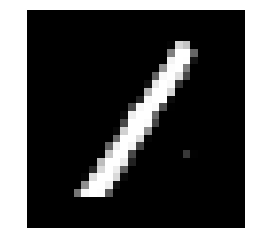

In [2]:
img = mnist.data[10000].reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

<p>但注意到這個資料集是有排序的</p>
<p>依序從0~9，一種數字的圖片完了才換下一種</p>
<p>以下我們抓最前面和最後面連續幾張出來示意一下</p>

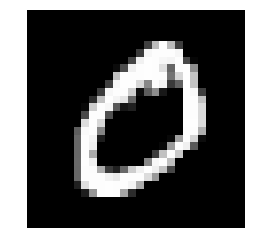

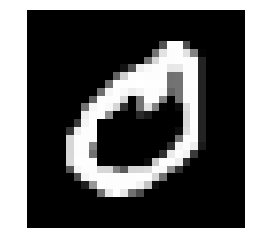

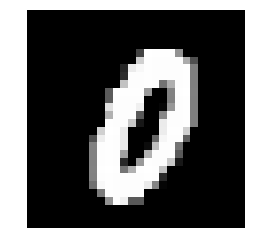

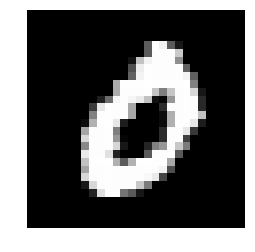

In [3]:
for i in range(4):
    img = mnist.data[i].reshape(28,28)
    plt.imshow(img, cmap='Greys_r')
    plt.axis('off')
    plt.show()

In [4]:
for i in range(4):
    print(mnist.target[i])

0.0
0.0
0.0
0.0


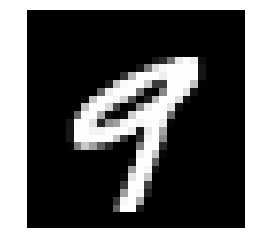

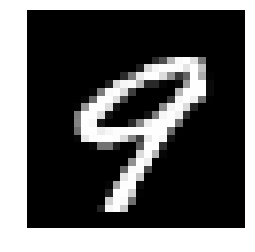

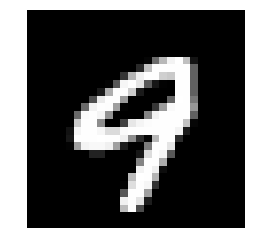

In [5]:
for i in range(69997,70000):
    img = mnist.data[i].reshape(28,28)
    plt.imshow(img, cmap='Greys_r')
    plt.axis('off')
    plt.show()

<p>因為資料集有照數字順序排列，所以不能直接將前60000筆與後10000筆分成訓練和測試的資料集</p>
<p>會產生測試的數字都沒學過的窘境，這邊用隨機的方式將資料分成訓練用和測試用兩部分</p>

In [6]:
index = np.arange(len(mnist.data))
random.shuffle(index)
train_index = index[0:60000]
test_index = index[60000:70000]
X_train, y_train = mnist.data[train_index], mnist.target[train_index]
X_test, y_test = mnist.data[test_index], mnist.target[test_index]

<p>展示一下前5筆訓練資料，確認是否真的已經打散了</p>
<p>這邊可以特別留一下第四筆的那個 9 ，就算給人類辨識恐怕也很難正確的識別</p>

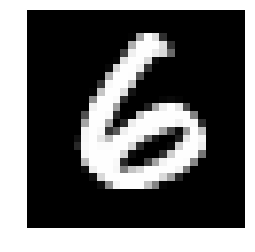

6.0


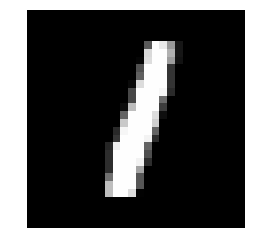

1.0


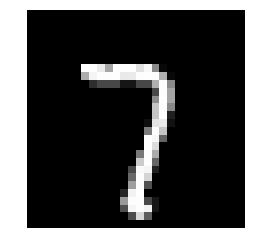

7.0


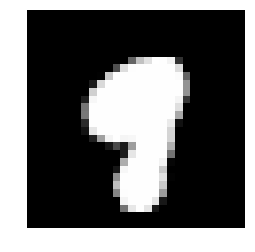

9.0


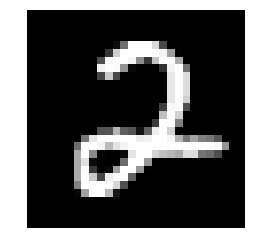

2.0


In [7]:
for i in range(5):
    img = X_train[i].reshape(28,28)
    plt.imshow(img, cmap='Greys_r')
    plt.axis('off')
    plt.show()
    print(y_train[i])

<p>再來要對我們的data進行維度的化簡(Dimension Reduction)</p>
<p>使用主成分分析(Principal components analysis，PCA)的方法實現</p>
<p>先試試能解釋掉97%變異的版本，還原後秀出的圖片效果還算不錯</p>
<p>不過仍需要用到213個成分來表達，即降至213維</p>

In [8]:
pca = PCA(n_components=0.97 , svd_solver='full')
newX_train = pca.fit_transform(X_train)
newX_test = pca.transform(X_test)
newX_train = newX_train/255
newX_test = newX_test/255
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

213
0.9700310740752591


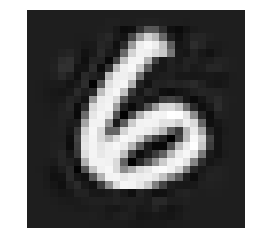

6.0


In [9]:
img = pca.inverse_transform(newX_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(y_train[0])

<p>再來看到維度降至30的版本</p>
<p>僅解釋掉了73%的變異，還原後的圖片還能辨識，不過也明顯模糊了不少</p>
<p>但實際上在這維度較低的情況下，辨識器反而有了更佳出色的表現</p>

In [10]:
pca = PCA(n_components=30)
newX_train = pca.fit_transform(X_train)
newX_test = pca.transform(X_test)
newX_train = newX_train/255
newX_test = newX_test/255
print(pca.n_components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

30
[335143.91095583 245401.28019159 211166.35289893 185258.68971985
 167701.82461686 147804.00183656 112621.73784284  98991.48376452
  94760.05974489  80414.75259171  72214.14071187  70261.74282109
  58596.58299462  58222.52630448  54361.45331494  50986.72014509
  45494.70788512  43889.59733865  40778.50599461  39530.54225959
  36374.64659473  34644.85890526  32853.97917083  31219.37560888
  30296.57374554  28902.78162821  27721.55297273  26881.24252629
  25382.19720244  23642.81984814]
[0.0976442  0.07149768 0.06152333 0.05397513 0.04885994 0.0430627
 0.03281235 0.02884117 0.02760835 0.02342884 0.02103959 0.02047076
 0.01707212 0.01696314 0.01583821 0.01485498 0.01325489 0.01278724
 0.01188082 0.01151723 0.01059776 0.01009378 0.00957201 0.00909577
 0.00882691 0.00842083 0.00807668 0.00783185 0.0073951  0.00688834]
0.7317316920684869


In [11]:
print(newX_train.shape)
print(newX_test.shape)

(60000, 30)
(10000, 30)


[ 3.47505082 -0.41036824  0.8417943   2.66116165  2.078913   -2.0374297
  0.70724602 -2.71913034 -0.53999122  0.80649087 -1.92377011 -0.15169991
  0.31957543  0.00936764  0.65800358 -1.4268259   0.45465513  1.07155661
  0.74045223 -0.50392801  1.27455116  0.48063838 -0.72933084 -0.87153986
 -0.0459079   0.66131707 -0.50311112  0.06548257  0.06388925 -0.14932155]


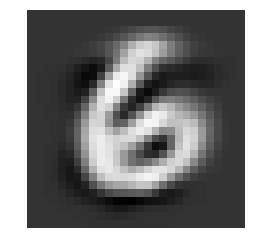

6.0


In [12]:
print(newX_train[0])
img = pca.inverse_transform(newX_train[0]*255)
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(y_train[0])

<p>使用SVC(Support Vector Classification)進行模型的訓練與辨識</p>
<p>有著相當出色的辨識率，對測試資料也達到了98%</p>

In [13]:
clf = SVC()
clf.fit(newX_train, y_train)
print("訓練資料辨識率:",np.mean(clf.predict(newX_train) == y_train))
print("測試資料辨識率:",np.mean(clf.predict(newX_test) == y_test)) 

訓練資料辨識率: 0.9912833333333333
測試資料辨識率: 0.9801


稍微看一下我們所訓練出來的支持向量(Support Vectors)

In [14]:
print(clf.support_)
print(clf.support_.shape)
print(clf.support_vectors_)
print(clf.support_vectors_.shape)
print("\n",clf.n_support_)

[   80   175   274 ... 59954 59956 59984]
(10142,)
[[ 5.36596681 -0.7071371  -3.21947325 ...  0.66312636 -1.17823336
   0.86912035]
 [ 0.70931697 -0.2476552  -0.23479083 ... -1.0837725  -0.33227122
  -0.30002169]
 [ 2.49296818 -0.53250147 -0.12011075 ... -1.36115817 -0.12535155
   0.94404145]
 ...
 [-0.81600162  1.97549734  0.25165286 ... -0.82148394  0.15362104
  -0.78994748]
 [-0.72474738  1.18960451 -0.11624841 ...  0.33828941 -0.3039253
  -1.37084497]
 [-1.13320831  0.55846794 -2.86448033 ... -0.53206309  0.73573195
   0.34001719]]
(10142, 30)

 [ 696  417 1134 1236 1050 1246  748  911 1328 1376]


<p>最後還記得前面有一個難以辨識的9嗎，在訓練資料的第四筆，也就是陣列index為3的位置</p>
<p>我們訓練出來的辨識器很成功的將這個數字辨識出來了!</p>

In [17]:
clf.predict(newX_train[3].reshape(1,-1))

array([9.])